In [1]:
# Импортируем необходимые для работы библиотеки
import pandas as pd
import matplotlib.pyplot as plt

## 1. Знакомство с данными. 

In [2]:
# Загружаем данные.
pd.set_option('display.float_format', '{:.2f}'.format)
try:
    data = pd.read_csv('/datasets/real_estate_data.csv',sep='\t')
except:
    data = pd.read_csv('real_estate_data.csv',sep='\t')
#выводим для ознакомления первые 10 строк датасета
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.00,108.00,2019-03-07T00:00:00,3,2.70,16.00,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.00,16028.00,1.00,482.00,2.00,755.00,NaN
1,7,3350000.00,40.40,2018-12-04T00:00:00,1,NaN,11.00,18.60,1,NaN,...,11.00,2.00,посёлок Шушары,12817.00,18603.00,0.00,NaN,0.00,NaN,81.00
2,10,5196000.00,56.00,2015-08-20T00:00:00,2,NaN,5.00,34.30,4,NaN,...,8.30,0.00,Санкт-Петербург,21741.00,13933.00,1.00,90.00,2.00,574.00,558.00
3,0,64900000.00,159.00,2015-07-24T00:00:00,3,NaN,14.00,NaN,9,NaN,...,NaN,0.00,Санкт-Петербург,28098.00,6800.00,2.00,84.00,3.00,234.00,424.00
4,2,10000000.00,100.00,2018-06-19T00:00:00,2,3.03,14.00,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.00,8098.00,2.00,112.00,1.00,48.00,121.00
5,10,2890000.00,30.40,2018-09-10T00:00:00,1,NaN,12.00,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.00
6,6,3700000.00,37.30,2017-11-02T00:00:00,1,NaN,26.00,10.60,6,NaN,...,14.40,1.00,посёлок Парголово,52996.00,19143.00,0.00,NaN,0.00,NaN,155.00
7,5,7915000.00,71.60,2019-04-18T00:00:00,2,NaN,24.00,NaN,22,NaN,...,18.90,2.00,Санкт-Петербург,23982.00,11634.00,0.00,NaN,0.00,NaN,NaN
8,20,2900000.00,33.16,2018-05-23T00:00:00,1,NaN,27.00,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.00
9,18,5400000.00,61.00,2017-02-26T00:00:00,3,2.50,9.00,43.60,7,NaN,...,6.50,2.00,Санкт-Петербург,50898.00,15008.00,0.00,NaN,0.00,NaN,289.00


In [3]:
data.info() #выводим общую информацию для ознакомления со столбцами и типами данных в них

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

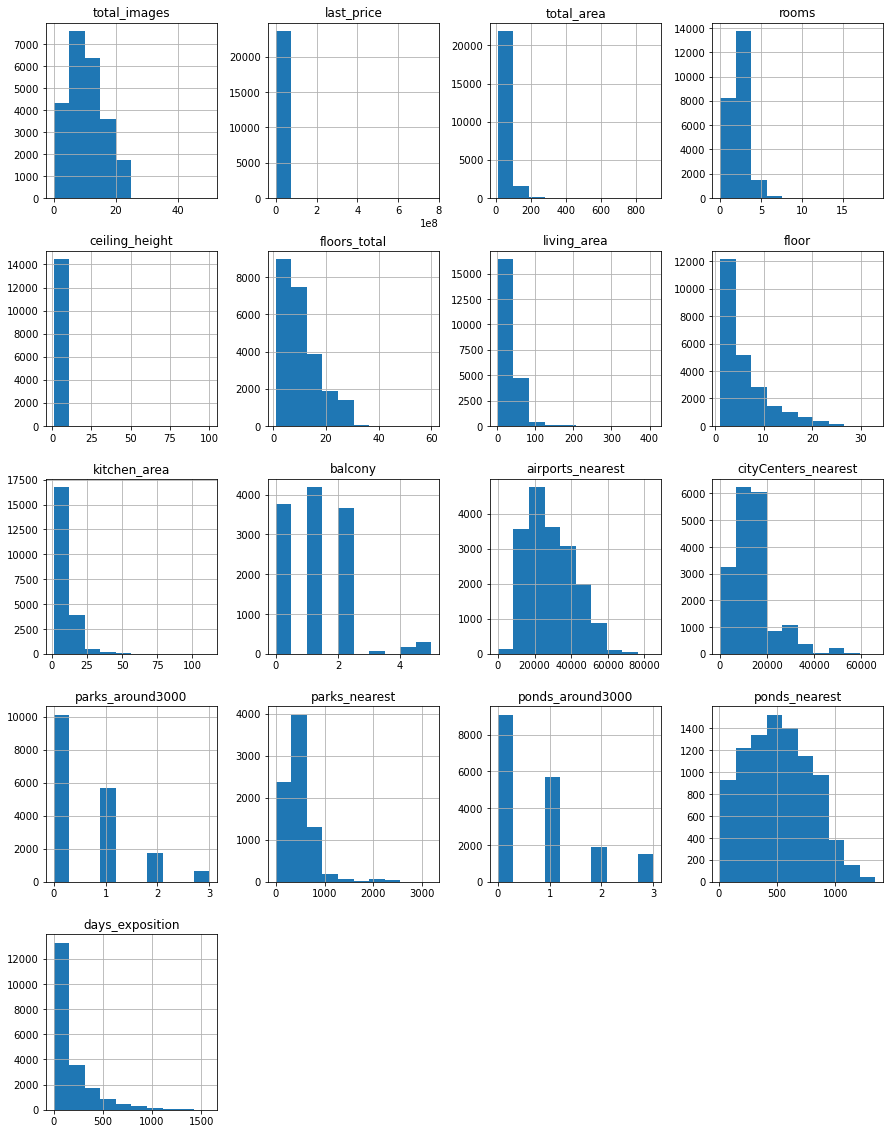

In [4]:
data.hist(figsize=(15, 20)); #строим гистограммы для всех столбцов датафрейма,
                            #чтобы первично ознакомиться с данными.

## 2. Предобработка данных.

### 2.1. Проверка пропущенных значений и их обработка.

In [5]:
# проверяем весь датасет на наличие пропущенных значений
data.isna().sum() 

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [6]:
# создадим цикл, который выведет нам только строки с пропущенными значениями
# и какой процент они составляют от общего количества строк
for column in data.columns:
    if data[column].isna().sum() > 0:
        print(column)
        print('Количество пропущенных значений:',data[column].isna().sum())
        print('Процент пропущенных значений от общего количества:', \
              str(round(data[column].isna().sum() / len(data[column])*100, 2))+'%');

ceiling_height
Количество пропущенных значений: 9195
Процент пропущенных значений от общего количества: 38.8%
floors_total
Количество пропущенных значений: 86
Процент пропущенных значений от общего количества: 0.36%
living_area
Количество пропущенных значений: 1903
Процент пропущенных значений от общего количества: 8.03%
is_apartment
Количество пропущенных значений: 20924
Процент пропущенных значений от общего количества: 88.29%
kitchen_area
Количество пропущенных значений: 2278
Процент пропущенных значений от общего количества: 9.61%
balcony
Количество пропущенных значений: 11519
Процент пропущенных значений от общего количества: 48.61%
locality_name
Количество пропущенных значений: 49
Процент пропущенных значений от общего количества: 0.21%
airports_nearest
Количество пропущенных значений: 5542
Процент пропущенных значений от общего количества: 23.38%
cityCenters_nearest
Количество пропущенных значений: 5519
Процент пропущенных значений от общего количества: 23.29%
parks_around3000
К

На данном этапе остаются без изменений столбцы:
* **ceiling_height** - При первичном осмотре видно, что в значениях данного столбца есть выбросы как в большую, так и в меньшую сторону, соответственно на данном этапе мы не можем заполнить пропущенные значения ни медианой, ни средним, т.к. они будут некорректными
* **living_area** - В данных присутствуют выбросы, поэтому заполнять пропуски на данном этапе будет некорректно.
* **kitchen_area** - В данных присутствуют выбросы, поэтому заполнять пропуски на данном этапе будет некорректно.
* **days_exposition** - Пропущенные значения в столбце заполнить нет возможности, т.к. нет данных, на основании которых можно было бы это сделать, а заполнять пропуски 0, медианой или средним будет некорректно, т.к. это исказит общую картину данных
* **is_apartment**  - в столбце более 88% пропущенных значений, удалить такое количество мы не можем, т.к. это сильно исказит общую картину, но и использовать с таким количеством пропусков данные не можем тоже, поэтому оставляем в этом столбце все как есть

Исправляем или отбрасываем пропущенные значения в столбцах:
* **floors_total** - пропущено всего 0.36% значений, можем отбросить их без искажения картины данных
* **balcony** - Логично предположить, что если количество балконов не указано, то, скорей всего, их нет. Соответственно можно заменить пропущенные значения на 0
* **locality_name** - пропущено всего 0.21% значений, можем отбросить их без искажения картины данных
* **parks_around3000** - Пропуски могут быть связаны со столбцом parks_nearest
* **ponds_around3000** -Пропуски могут быть связаны со столбцом ponds_nearest

Значения, которые обозначают расстояние заполнить возможности нет, т.к. это будет некорректно, поэтому оставляем и формат и пропущенные значения как есть:

* **parks_nearest**
* **ponds_nearest**
* **airports_nearest** 
* **cityCenters_nearest**


##### Столбец `floors_total`

In [7]:
# отбрасываем пропущенные значения
data = data[data['floors_total'].notna()]
# проверяем, что строки удалились
len(data)

23613

##### Столбец `balcony`

Логично предположить, что если количество балконов не указано, то, скорей всего, их нет. Соответственно можно заменить пропущенные значения на 0


In [8]:
data['balcony'] = data['balcony'].fillna(value= 0) #заменяем пропущенные значения на 0
print(f'Список уникальных значений в столбце после заполнения пропусков: {data.balcony.unique()}') 

Список уникальных значений в столбце после заполнения пропусков: [0. 2. 1. 5. 4. 3.]


##### Столбец `locality_name`

Так как пропущенных значений всего 0,21% мы можем исключить их из датасета без потерь для общей картины

In [9]:
# отбрасываем пропущенные значения
data = data[data['locality_name'].notna()]
# проверяем, что строки удалились
len(data)

23565

##### Столбец `parks_around3000`

Проверим, совпадает ли количество значений 0 в столбце parks_around3000 и значений 'nan' в столбце parks_nearest

In [10]:
print('Строки, где количество парков равно 0 и отстутствуют значения в столбце parks_nearest:')
print(len(data[(data['parks_around3000'] == 0) & (data['parks_nearest'].isna())]))
print('Строки, где количество парков равно 0, без учета значений в столбце parks_nearest:')
print(len(data[data['parks_around3000'] == 0]))

Строки, где количество парков равно 0 и отстутствуют значения в столбце parks_nearest:
10035
Строки, где количество парков равно 0, без учета значений в столбце parks_nearest:
10039


Теперь проверим совпадает ли количество строк со значением 'nan' в обоих столбцах

In [11]:
print('Строки, где количество парков равно 0 и отстутствует значение в столбце parks_nearest:')
print(len(data[(data['parks_around3000'].isna()) & (data['parks_nearest'].isna())]))
print('Строки, где количество парков равно 0, без учета значений в столбце parks_nearest:')
print(len(data[data['parks_around3000'].isna()]))

Строки, где количество парков равно 0 и отстутствует значение в столбце parks_nearest:
5500
Строки, где количество парков равно 0, без учета значений в столбце parks_nearest:
5500


Отсюда логично предположить, что значение 'nan' в столбце parks_around3000 обозначает, что парков поблизости нет, соответственно можем заполнить пропущенные значения на 0

In [12]:
data['parks_around3000'] = data['parks_around3000'].fillna(value=0) #заменяем пропущенные значения
data.parks_around3000.unique() # проверяем все ли пропущенные значения были заполнены

array([1., 0., 2., 3.])

##### Столбец `parks_nearest`

Проверим есть ли пустые значения в строках, где указано более 0 парков поблизости

In [13]:
data[(data['parks_around3000'] > 0) & (data['parks_nearest'].isna())]


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


Проверим максимальное расстояние до парка

In [14]:
#Максимальное расстояние до ближайшего парка
data.parks_nearest.max()

3190.0

Т.к. результат выполнения кода пустой датафрейм, можно предположить, что в строках, где пропущены значения в столбце parks_nearest, парков ближе 3190 метров нет, т.е. значения пропущены не случайно

##### Столбец `ponds_around3000`

Проведем ту же проверку для столбцов с водоемами, что и с парками - сначала сравним нулевые и пустые значения

In [15]:
print('Строки, где количество парков равно 0 и отстутствуют значения в столбце ponds_nearest:')
print(len(data[(data['ponds_around3000'] == 0) & (data['ponds_nearest'].isna())]))
print('Строки, где количество парков равно 0, без учета значений в столбце ponds_nearest:')
print(len(data[data['ponds_around3000'] == 0]))

Строки, где количество парков равно 0 и отстутствуют значения в столбце ponds_nearest:
9029
Строки, где количество парков равно 0, без учета значений в столбце ponds_nearest:
9029


Теперь проверим совпадает ли количество строк со значением 'nan' в обоих столбцах

In [16]:
print('Строки, где количество парков равно 0 и отстутствует значение в столбце parks_nearest:')
print(len(data[(data['ponds_around3000'].isna()) & (data['ponds_nearest'].isna())]))
print('Строки, где количество парков равно 0 и без учета значений в столбце parks_nearest:')
print(len(data[data['ponds_around3000'].isna()]))

Строки, где количество парков равно 0 и отстутствует значение в столбце parks_nearest:
5500
Строки, где количество парков равно 0 и без учета значений в столбце parks_nearest:
5500


Как и в предыдущем случае количество пустых значений совпадает в обоих столбцах, поэтому можем заполнить пустые значения в столбце ponds_around3000 как 0

In [17]:
data['ponds_around3000'] = data['ponds_around3000'].fillna(value=0) #заменяем пропущенные значения
data.ponds_around3000.unique() # проверяем все ли пропущенные значения были заполнены

array([2., 0., 3., 1.])

##### Столбец `ponds_nearest`

По аналогии с предыдущим примером проверим есть ли пустые значения в строках, где указано более 0 водоемов

In [18]:
data[(data['ponds_around3000'] > 0) & (data['ponds_nearest'].isna())]


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


Проверим максимальное расстояние до парка

In [19]:
data.ponds_nearest.max()

1344.0

Т.к. результат выполнения кода пустой датафрейм, можно предположить, что в строках, где пропущены значения в столбце ponds_nearest, водоемов ближе 1344 метров нет

**Вывод**
Значения в столбцах данного датафрейма могут отсутствовать по нескольким причинам:
* данные были некорректно либо не полностью выгружены
* данные не были внесены сотрудником при заполнении базы данных
* некоторые пропуски связаны с тем, что конкретное значение попросту отсутствует, т.е. рано 0

### 2.2. Проверка типов данных в столбцах.

Еще раз ознакомимся с типами данных в столбцах датасета

In [20]:
data.dtypes

total_images              int64
last_price              float64
total_area              float64
first_day_exposition     object
rooms                     int64
ceiling_height          float64
floors_total            float64
living_area             float64
floor                     int64
is_apartment             object
studio                     bool
open_plan                  bool
kitchen_area            float64
balcony                 float64
locality_name            object
airports_nearest        float64
cityCenters_nearest     float64
parks_around3000        float64
parks_nearest           float64
ponds_around3000        float64
ponds_nearest           float64
days_exposition         float64
dtype: object

Так как столбец, содержащий одновременно целые числа и пропущенные значения ('nan') не может иметь тип данных int, на данном этапе меняем формат тех столбцов, для которых это возможно:
* **last_price** - значения в столбце целые, поэтому изменим тип данных с float64 на int
* **first_day_exposition** - в столбце содержатся даты в формате 'Y-M-DTH:M:S', поэтому изменим тип данных с object на datetime
* **is_apartment** - т.к. значения в столбце только True и False, заменим тип данных с object на bool
* **balcony** количество балконов не может быть не целым, поэтому изменим тип данных с float64 на int
* **parks_around3000** - количество парков также не может быть НЕ целым, поэтому изменяем тип данных с float64 на int
* **ponds_around3000** - количество водоемов не может быть НЕ целым числом, поэтому изменяем тип данных с float64 на int


In [21]:
# Изменим формат столбца first_day_exposition на datetime
data['last_price'] = data['last_price'].astype('int')
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'] \
                                              , format='%Y-%m-%dT%H:%M:%S')
data['is_apartment']= data['is_apartment'].astype('bool')
data['balcony']= data['balcony'].astype('int')
data['parks_around3000'] = data['parks_around3000'].astype('int')
data['ponds_around3000'] = data['ponds_around3000'].astype('int')


In [22]:
data.dtypes #проверяем успешно ли прошли изменения

total_images                     int64
last_price                       int32
total_area                     float64
first_day_exposition    datetime64[ns]
rooms                            int64
ceiling_height                 float64
floors_total                   float64
living_area                    float64
floor                            int64
is_apartment                      bool
studio                            bool
open_plan                         bool
kitchen_area                   float64
balcony                          int32
locality_name                   object
airports_nearest               float64
cityCenters_nearest            float64
parks_around3000                 int32
parks_nearest                  float64
ponds_around3000                 int32
ponds_nearest                  float64
days_exposition                float64
dtype: object

### 2.3. Обработка дубликатов.

In [23]:
data.duplicated().sum() #проверяем датасет на наличие явных дубликатов

0

Обработаем неявные дубликаты в столбце locality_name

In [24]:
data.locality_name.value_counts() #количество уникальных значений до обработки - 364

Санкт-Петербург                    15651
посёлок Мурино                       520
посёлок Шушары                       439
Всеволожск                           398
Пушкин                               369
                                   ...  
поселок Каложицы                       1
посёлок Платформа 69-й километр        1
поселок Почап                          1
поселок Гончарово                      1
посёлок Дзержинского                   1
Name: locality_name, Length: 364, dtype: int64

Создадим функцию, которая заменит неявные дубликаты в столбце с наименованием населенного пункта и приведет их к общему виду


In [25]:
def rename_locality_name(name):                # объявляем функцию
   
    try:                                       # введем функцию try - except для того, чтобы код не остановился в случае ошибки
        as_list = name.split(' ')              # превращаем название в список с разделителем по пробелу
        new_name = ['поселок']                 # объявляем переменную, в которой будет новое значение
        if 'пос' in name:                      # если 'пос' есть в названии,
            for word in as_list:               # то проходим циклом по каждому значению списка и
                if word.istitle():             # каждое значение, которое начинается с заглавной буквы,
                    new_name.append(word)      # добавляем в заготовленную для вывода переменную нового имени
            return ' '.join(new_name)          # возвращаем полученное новое имя - 
                                               # соединяем список в переменной нового имени с разделителем в виде пробела      
        return name                            # ну а если 'пос' в названии нет, то просто возвращаем это же имя
        
    except:
        return 'ошибка переименования'
data['locality_name'] = data.locality_name \
                        .apply(rename_locality_name) # применяем данную функцию к столбцу locality_name

In [26]:
data.locality_name.value_counts() #количество уникальных значений до обработки - 319

Санкт-Петербург         15651
поселок Мурино            552
поселок Шушары            439
Всеволожск                398
Пушкин                    369
                        ...  
деревня Пельгора            1
поселок Каложицы            1
поселок Платформа           1
поселок Почап               1
поселок Дзержинского        1
Name: locality_name, Length: 318, dtype: int64

In [27]:
data[data['locality_name'] == 'ошибка переименования'] # Проверяем сработал ли код без ошибок


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


### 2.4. Обработка выбросов и аномалий в значениях столбцов.

#### Столбец `ceiling_height`

In [28]:
print(f'Минимальное значение столбца: {data.ceiling_height.min()}')
print(f'Максимальное значение столбца: {data.ceiling_height.max()}')

Минимальное значение столбца: 1.0
Максимальное значение столбца: 100.0


count   14481.00
mean        2.77
std         1.26
min         1.00
25%         2.51
50%         2.65
75%         2.80
max       100.00
Name: ceiling_height, dtype: float64


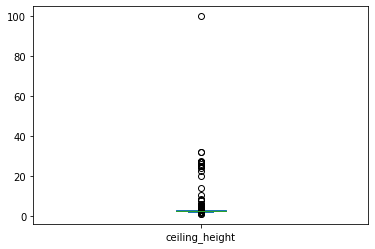

In [29]:
data.ceiling_height.plot(kind='box'); #посмотрим распределение значений
print(data.ceiling_height.describe());

Есть сильно выпадающее из общей массы значение (100м) и довольно большое количество значений, которые более 10 и даже 20 метров, это могло произойти из-за того, что запятая, отделяющая метры от сантиметров, была смещена в некоторых значениях вправо. Исправим данную ошибку

In [30]:
# все значения, которые больше 10 делим на 10
data.loc[data['ceiling_height'] >= 10, 'ceiling_height'] = data['ceiling_height']/10

count   14481.00
mean        2.73
std         0.30
min         1.00
25%         2.51
50%         2.65
75%         2.80
max        10.00
Name: ceiling_height, dtype: float64


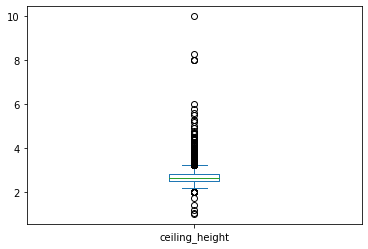

In [31]:
data.ceiling_height.plot(kind='box',)
print(data.ceiling_height.describe())

На графике распределения все равно остались выбросы. Реалистичные значения высоты потолков, что подтверждает и график, находятся в диапазоне от 2,5 до 4 метров. Посмотрим какую часть от общего количества значений составляют выбросы, чтобы понять можно ли их отбросить без искажения общей картины в данных.

In [32]:
print('Количество значений, попадающий в выброс:')
print(data[(data['ceiling_height'] <= 2.4) | \
           (data['ceiling_height'] > 3.5)]['ceiling_height'].count())
print('Процент выбросов от общего количества значений:')
print(str(round(data[(data['ceiling_height'] <= 2.4) |  \
                     (data['ceiling_height'] > 3.5)]['ceiling_height'].count() \
      / data['ceiling_height'].count()*100, 2))+'%')

Количество значений, попадающий в выброс:
327
Процент выбросов от общего количества значений:
2.26%


Т.к. выбросы составляют всего 2,26%, можно отбросить их и заполнить прощенные значения медианой значений, находящихся в пределах устраивающего нас диапазона. Чтобы не удалять строки из исходного датасета создадим переменную good_data, с которой и будем дальше работать.

In [33]:
data['ceiling_height'] = data['ceiling_height'] \
                        .fillna(data[(data['ceiling_height'] >= 2.4) & \
                                     (data['ceiling_height'] <= 3.5)] \
                                ['ceiling_height'].median())
good_data = data[(data['ceiling_height'] >= 2.4) & \
                 (data['ceiling_height'] <= 3.5)]

Проверим как теперь выглядит распределение значений в данном столбце

count   23262.00
mean        2.68
std         0.18
min         2.40
25%         2.60
50%         2.65
75%         2.70
max         3.50
Name: ceiling_height, dtype: float64


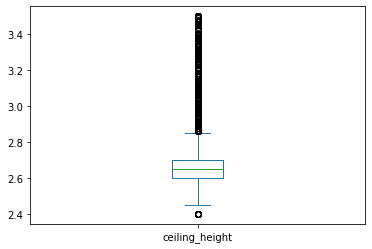

In [34]:
print(good_data.ceiling_height.describe())
good_data.ceiling_height.plot(kind='box');

#### Столбец `last_price`

In [35]:
print(f'Минимальное значение столбца: {data.last_price.min()}')
print(f'Максимальное значение столбца: {data.last_price.max()}')

Минимальное значение столбца: 12190
Максимальное значение столбца: 763000000


count       23262.00
mean      6354590.84
std      10376495.51
min         12190.00
25%       3400000.00
50%       4600000.00
75%       6700000.00
max     763000000.00
Name: last_price, dtype: float64


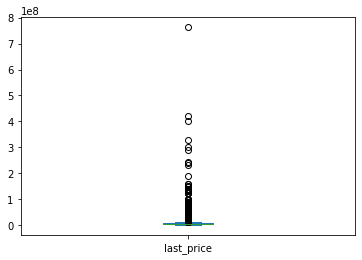

In [36]:
print(good_data.last_price.describe());
good_data.last_price.plot(kind='box');

In [37]:
print('Количество строк, которые относятся к выбросу за верхнюю границу:')
print(good_data[good_data['last_price'] >= 20000000]['last_price'].count())
print('Процент от общего количества строк:')
print(str(round(good_data[good_data['last_price'] >= 20000000]['last_price'].count() \
                / good_data['total_area'].count()*100, 2))+'%')

Количество строк, которые относятся к выбросу за верхнюю границу:
651
Процент от общего количества строк:
2.8%


Данные в выбросах корректны, но, т.к. они сильно выбиваются за пределы основного диапазона значений и составляют всего 2.8% от общего количества строк, мы не будем брать в расчет значения больше 20 000 000 и значения меньше 200 000.

In [38]:

good_data = good_data[(good_data['last_price'] >= 200000) &(good_data['last_price'] <= 20000000)]

#### Столбец `total_area`

Минимальная общая площадь: 12.0
Максимальная общая площадь: 460.8


count   22625.00
mean       56.39
std        24.37
min        12.00
25%        39.90
50%        50.90
75%        67.00
max       460.80
Name: total_area, dtype: float64

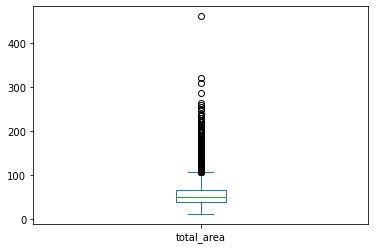

In [39]:
# Посмотрим на диапазон значений в столбце total_area
print(f'Минимальная общая площадь: {good_data.total_area.min()}')
print(f'Максимальная общая площадь: {good_data.total_area.max()}')
# Построим диаграмму распределения
good_data.total_area.plot(kind='box')
good_data.total_area.describe()


In [40]:
print('Количество строк, которые относятся к выбросу за верхнюю границу:')
print(good_data[good_data['total_area'] >= 150]['total_area'].count())
print('Процент от общего количества строк:')
print(str(round(good_data[good_data['total_area'] >= 150]['total_area'].count() \
                / good_data['total_area'].count()*100))+'%')

Количество строк, которые относятся к выбросу за верхнюю границу:
178
Процент от общего количества строк:
1%


Данные в выбросах корректны, но, т.к. они сильно выбиваются за пределы основного диапазона значений и составляют всего 1% от общего количества строк, мы не будем брать в расчет значения больше 150м.

In [41]:
good_data = good_data[good_data['total_area'] <= 150] # Оставляем в датасете только строки с общей площадью до 150м


#### Столбец `floors_total`

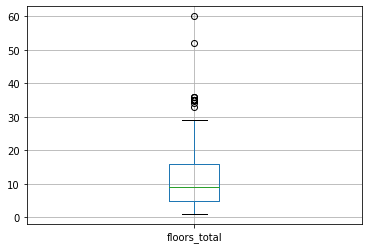

In [42]:
# Убираем строки с пропущенными значениями в данном столбце, т.к. их количество является небольшим
good_data = good_data[good_data['floors_total'].notna()]
# Раз пропущенных значений больше нет, можем изменить тип данных этого столбца на int, 
#т.к. количество этажей может быть только целым числом
good_data['floors_total'] = good_data['floors_total'].astype('int') 
good_data.boxplot('floors_total');

In [43]:
print('Количество строк, которые относятся к выбросу за верхнюю границу:')
print(good_data[good_data['floors_total'] >= 30]['floors_total'].count())
print('Процент от общего количества строк:')
print(str(round(good_data[good_data['floors_total'] >= 30]['floors_total'].count() \
                / good_data['floors_total'].count()*100, 2))+'%')

Количество строк, которые относятся к выбросу за верхнюю границу:
31
Процент от общего количества строк:
0.14%


Из графика видно, что выбивающиеся значения совсем редкие, поэтому можем отбросить их без искажения общей картины данных

In [44]:
good_data = good_data[good_data['floors_total'] <= 30]

#### Столбец `living_area`

Проверим распределение значений в столбце

count   20686.00
mean       31.75
std        14.78
min         2.00
25%        18.30
50%        30.00
75%        40.90
max       128.00
Name: living_area, dtype: float64


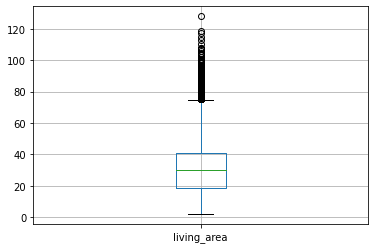

In [45]:
print(good_data.living_area.describe())
good_data.boxplot('living_area');

In [46]:
print('Количество строк, которые относятся к выбросу за верхнюю границу:')
print(good_data[good_data['living_area'] > 80]['living_area'].count())
print('Процент от общего количества строк:')
print(str(round(good_data[good_data['living_area'] > 80]['living_area'].count() / good_data['living_area'].count()*100))+'%')

Количество строк, которые относятся к выбросу за верхнюю границу:
178
Процент от общего количества строк:
1%


Из графика видно, что редкими выбросами являются значения больше значения в 80м. Поэтому исключим все значения, которые больше этого из датасета?, т.к. они составляют его небольшую часть, но при этом могут искажать общую картину

In [47]:
good_data = good_data[good_data['living_area'] <= 80]


Проверим поменялось ли распределение значений в столбце

count   20508.00
mean       31.24
std        13.77
min         2.00
25%        18.30
50%        29.80
75%        40.20
max        80.00
Name: living_area, dtype: float64


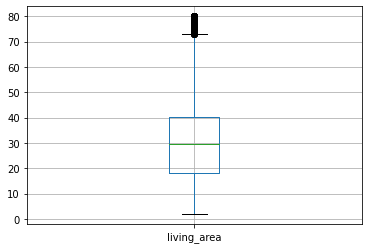

In [48]:
print(good_data.living_area.describe())
good_data.boxplot('living_area');

После устранения выбросов можно заполнить пропущенные значения медианой. При этом необходимо проверить не получится ли так, что жилая площадь будет больше общей

In [49]:
# заполняем пропущенные значения медианой
good_data['living_area'] = good_data['living_area'].fillna(good_data['living_area'].median())
# проверяем есть ли строки, где жилая площадь больше, чем общая
good_data[good_data['living_area'] > good_data['total_area']]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


count   19752.00
mean        9.91
std         4.45
min         1.30
25%         7.00
50%         9.00
75%        11.20
max        64.00
Name: kitchen_area, dtype: float64


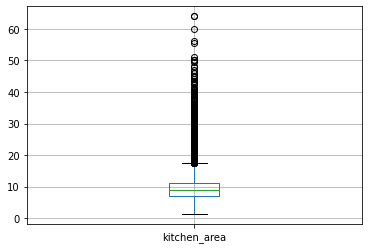

In [50]:
print(good_data.kitchen_area.describe())
good_data.boxplot('kitchen_area');

In [51]:
print('Количество строк, которые относятся к выбросу за верхнюю границу:')
print(good_data[good_data['kitchen_area'] > 20]['kitchen_area'].count())
print('Процент от общего количества строк:')
print(str(round(good_data[good_data['kitchen_area'] > 20]['kitchen_area'].count() / good_data['kitchen_area'].count()*100))+'%')

Количество строк, которые относятся к выбросу за верхнюю границу:
551
Процент от общего количества строк:
3%


Из графика видно, что редкими выбросами являются значения больше значения в 20м. Поэтому исключим все значения, которые больше этого из датасета, т.к. они составляют его небольшую часть, но при этом могут искажать общую картину

In [52]:
good_data = good_data[good_data['kitchen_area'] < 20]


**Вывод** 
Столбцы отображающие характеристики жилья имели выбросы в значениях по различным причинам:
* не заполненные данные
* некорректно внесенные данные
* элитное жилье или уникальные объекты недвижимости, которое представлено в единичных экземплярах, но при этом оказывает влияние на общую картину в датасете

Пропущенные значения в столбцах, обозначающих расстояние до других объектов, делятся на 2 типа:
* значение не указано, т.к. превышает максимальное расстояние
* значение не внесено изначально

После всех манипуляций с данными сравним изначальный датасет и тот, с которым будем работать в дальнейшем.

In [53]:
# Старый датасет до обработки
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23565.00,23565.00,23565.00,23565.00,23565.00,23565.00,21700.00,23565.00,21343.00,23565.00,18041.00,18064.00,23565.00,8030.00,23565.00,9036.00,20394.00
mean,9.88,6540058.26,60.32,2.07,2.70,10.68,34.45,5.88,10.56,0.59,28797.08,14192.66,0.47,490.58,0.59,518.29,180.74
std,5.68,10910934.72,35.66,1.08,0.24,6.59,22.05,4.87,5.90,0.96,12632.50,8613.35,0.75,341.57,0.88,278.01,219.73
min,0.00,12190.00,12.00,0.00,1.00,1.00,2.00,1.00,1.30,0.00,0.00,181.00,0.00,1.00,0.00,13.00,1.00
25%,6.00,3400000.00,40.00,1.00,2.60,5.00,18.60,2.00,7.00,0.00,18565.00,9238.00,0.00,288.00,0.00,293.00,45.00
50%,9.00,4646000.00,52.00,2.00,2.65,9.00,30.00,4.00,9.10,0.00,26757.00,13096.50,0.00,455.00,0.00,503.00,95.00
75%,14.00,6790000.00,69.70,3.00,2.70,16.00,42.30,8.00,12.00,1.00,37273.00,16285.00,1.00,612.00,1.00,730.00,231.00
max,50.00,763000000.00,900.00,19.00,10.00,60.00,409.70,33.00,112.00,5.00,84869.00,65968.00,3.00,3190.00,3.00,1344.00,1580.00


In [54]:
# Новый датасет после обработки
good_data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,19109.00,19109.00,19109.00,19109.00,19109.00,19109.00,19109.00,19109.00,19109.00,19109.00,14578.00,14594.00,19109.00,6177.00,19109.00,6932.00,16649.00
mean,9.94,5106361.93,54.20,1.97,2.67,10.66,31.17,5.85,9.36,0.63,28930.79,14892.38,0.43,491.88,0.54,530.92,179.27
std,5.56,2710336.72,19.22,0.89,0.16,6.48,13.53,4.80,3.04,0.96,12973.35,8551.68,0.71,335.03,0.84,276.00,216.06
min,0.00,430000.00,14.00,1.00,2.40,1.00,2.00,1.00,1.30,0.00,0.00,287.00,0.00,1.00,0.00,13.00,1.00
25%,6.00,3400000.00,39.60,1.00,2.60,5.00,18.30,2.00,7.00,0.00,17950.75,10565.00,0.00,293.00,0.00,314.00,43.00
50%,10.00,4500000.00,50.00,2.00,2.65,9.00,29.90,4.00,9.00,0.00,27189.00,13497.00,0.00,458.00,0.00,517.00,98.00
75%,14.00,6100000.00,64.60,3.00,2.70,15.00,40.00,8.00,11.00,1.00,37631.75,16555.75,1.00,614.00,1.00,739.00,229.00
max,39.00,20000000.00,146.00,6.00,3.50,29.00,80.00,27.00,19.94,5.00,84869.00,65968.00,3.00,3190.00,3.00,1344.00,1580.00


In [55]:
# разница между датасетами
data.describe() - good_data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,4456.00,4456.00,4456.00,4456.00,4456.00,4456.00,2591.00,4456.00,2234.00,4456.00,3463.00,3470.00,4456.00,1853.00,4456.00,2104.00,3745.00
mean,-0.06,1433696.33,6.12,0.10,0.03,0.01,3.28,0.03,1.21,-0.04,-133.70,-699.73,0.04,-1.30,0.05,-12.63,1.47
std,0.13,8200598.00,16.43,0.19,0.08,0.12,8.51,0.07,2.86,-0.00,-340.85,61.67,0.04,6.55,0.05,2.00,3.67
min,0.00,-417810.00,-2.00,-1.00,-1.40,0.00,0.00,0.00,0.00,0.00,0.00,-106.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.40,0.00,0.00,0.00,0.30,0.00,0.00,0.00,614.25,-1327.00,0.00,-5.00,0.00,-21.00,2.00
50%,-1.00,146000.00,2.00,0.00,0.00,0.00,0.10,0.00,0.10,0.00,-432.00,-400.50,0.00,-3.00,0.00,-14.00,-3.00
75%,0.00,690000.00,5.10,0.00,0.00,1.00,2.30,0.00,1.00,0.00,-358.75,-270.75,0.00,-2.00,0.00,-9.00,2.00
max,11.00,743000000.00,754.00,13.00,6.50,31.00,329.70,6.00,92.06,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


### 2.5. Расчет дополнительных параметров.

In [56]:
#цена одного квадратного метра
good_data['price_for_meter'] = good_data['last_price'] / good_data['total_area']

#день недели публикации объявления (0 — понедельник, 1 — вторник и так далее)
good_data['dow'] = good_data['first_day_exposition'].dt.dayofweek

#месяц публикации объявления
good_data['mow'] = good_data['first_day_exposition'].dt.month

#год публикации объявления
good_data['yow'] = good_data['first_day_exposition'].dt.year

#тип этажа квартиры (значения — «первый», «последний», «другой»)
#создадим функцию, которая будет присваивать группу этажности на основании этажа
def floor_type(row):
    floor = row['floor']
    top_floor = row['floors_total']    
    try:
        if floor == 1:
            return 'первый'
        if floor == top_floor:
            return 'последний'
        else:
            return 'другой'
    except:
        return 'этаж не определен'
# применим данную функцию к датасету и запишем результат в столбец 'type_floor'   
good_data['type_floor'] = good_data.apply(floor_type, axis=1) 

#расстояние до центра города в километрах (переведите из м в км и округлите до целых значений)
good_data['km_to_center'] = round(good_data['cityCenters_nearest']/1000)

## 3. Исследовательский анализ данных.

### 3.1. Визуализация столбцов с ключевыми параметрами.

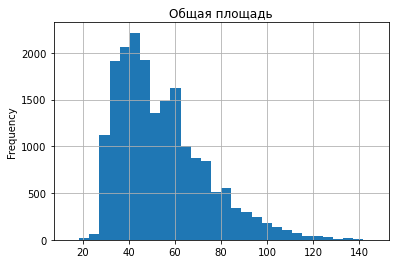

In [57]:
good_data.total_area.plot(kind='hist', bins=30, title='Общая площадь', grid=True);


Данные имеют почти стандартное распределение, что показывает нам, что основная масса объектов недвижимости имеет общую площадь около 40 метров, меньшая площадь встречается намного реже. С увеличением площади объектов количесвто предложений снижается плавно.

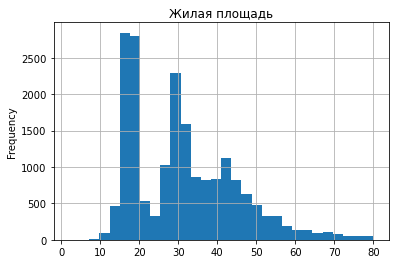

In [58]:
good_data.living_area.plot(kind='hist',bins=30, title='Жилая площадь', grid=True);


На графике хорошо видны несколько всплесков в количестве значений - в районе 15-20 метров и в районе 40 метров, что может быть связано с количеством комнат в помещении.

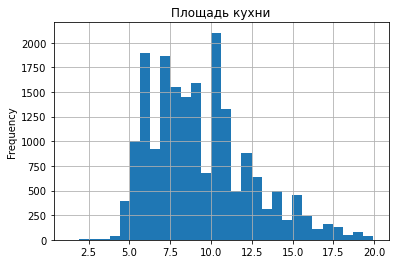

In [59]:
good_data.kitchen_area.plot(kind='hist',bins=30, title='Площадь кухни', grid=True);

Распределение значений площади кухни неоднородное - наибольшие количества кухонь имеют значения - 6, 7 и 10 метров.

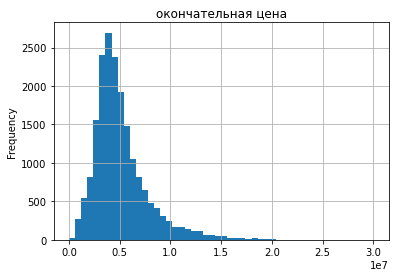

In [60]:
good_data.last_price.plot(kind='hist',bins=50,title='окончательная цена', range=(0, 30000000), grid=True);

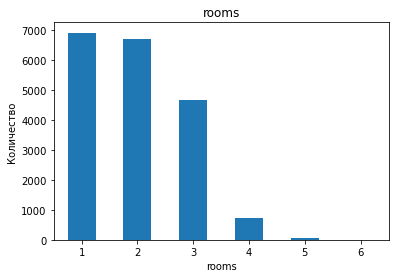

In [61]:
good_data.groupby('rooms')['rooms'].count() \
         .plot(kind='bar', rot='360', ylabel='Количество', title='rooms');

Из графика видно, что на рынке представлено больше всего объектов недвижимости с 1й или 2мя комнатами. Также наблюдается тенденция, что с увеличением количества комнат количество предложений снижается.

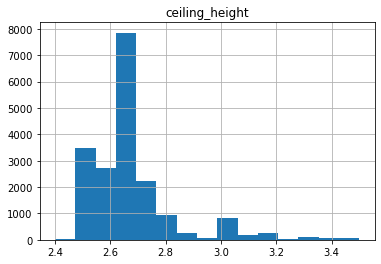

In [62]:
good_data.hist('ceiling_height',bins=15);

На графике видно, что большая часть объектов недвижимости имеет высоту потолков 2.6 - 2.7 метра, также из основной массы значений выделяется высота в 2.5 метра.

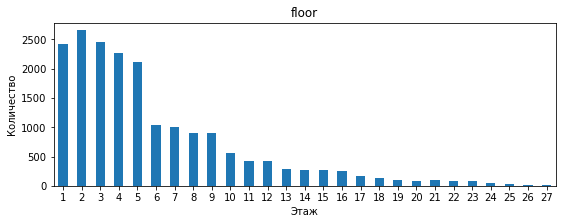

In [63]:
good_data.groupby('floor')['floor'].count().plot(kind='bar', rot='360', ylabel='Количество', xlabel='Этаж', title='floor',figsize=(9,3));

Больше всего предложений с объектами недвижимости, находящимися на 1м - 5м этажах (что логично, т.к. в большинстве населенных пунктов здания в основном 5-этажные), с увеличением значения этажа количество предложений снижается с резкими спадами после 5го, 9го и 12го и 16го этажей, судя по всему это обусловлено высотой зданий

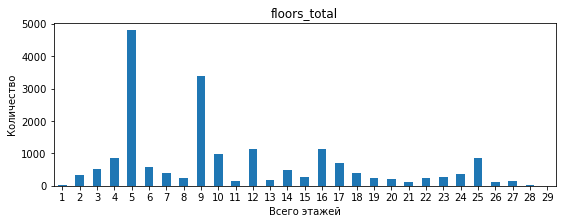

In [64]:
good_data.groupby('floors_total')['floors_total'].count().plot(kind='bar', rot='360', ylabel='Количество', xlabel='Всего этажей', title='floors_total',figsize=(9,3));

Как и было указано выше - наибольшее количество объектов недвижимости располагается в строениях высотой 5, 9, 12 и 16 этажей

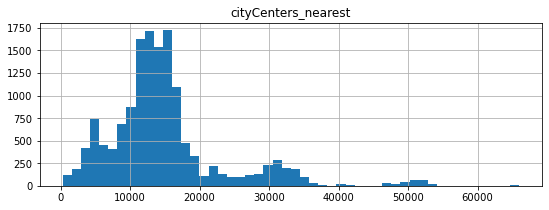

In [65]:
good_data.hist('cityCenters_nearest',bins=50,figsize=(9,3));

Большая часть объектов недвижимости расположена на удалении от 10 до 15 км от городского центра, но встречаются и отдаленные места (более 40км)

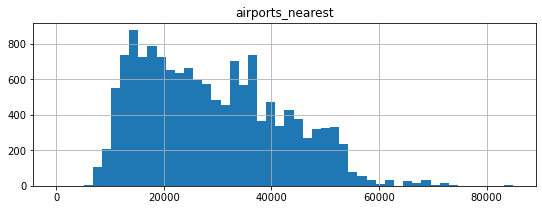

In [66]:
good_data.hist('airports_nearest',bins=50,figsize=(9,3));

Большая часть объектов недвижимости находится на удалении от 10 до 40 км от аэропортов, дальше 50 км количество предложений сильно снижается

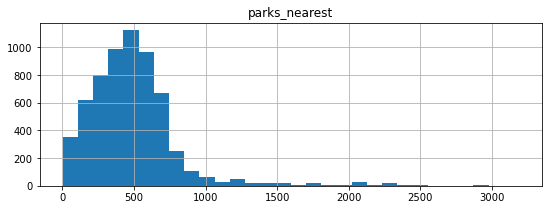

In [67]:
good_data.hist('parks_nearest',bins=30,figsize=(9,3));

Удаленность от парка выглядит как стандартное распределение начинаясь от 0м (здание, где находится объект невдижимости, может быть в самом парке), с пиком в районе 500м (максимальное количестно предложений), и довольно резким спадом после 600 метров

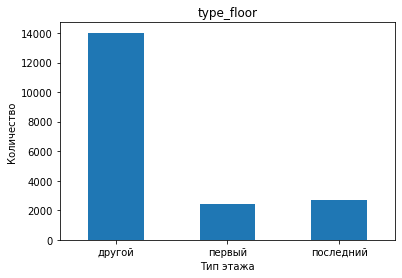

In [68]:
good_data.groupby('type_floor')['type_floor'].count().plot(kind='bar', rot='360', ylabel='Количество', xlabel='Тип этажа', title='type_floor');

Из графика видно, что количество объектов недвижимости, находящихся на 1м или последнем этажах почти равно, в то время как количество других этажей намного больше, что логично, т.к. в многоэтажных домах 1х и последних этажей только по одному, а "других" может быть сколько угодно

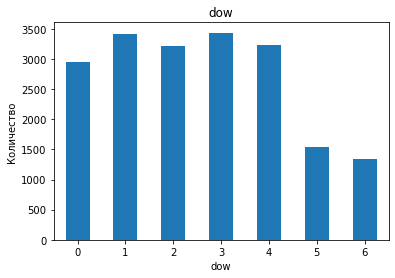

In [69]:
good_data.groupby('dow')['dow'].count().plot(kind='bar', rot='360', ylabel='Количество', title='dow');

на графике отчетливо видно, что большая часть объявлений была размещена в будние дни (больше всего во вторник и четверг), в то время как в выходные активность намного ниже. В субботу также размещено больше объявлений, чем в воскресенье.

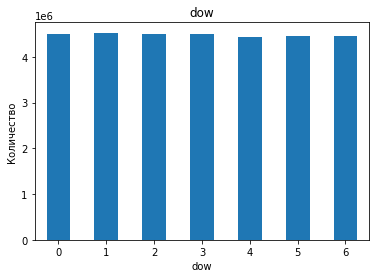

In [70]:
good_data.groupby('dow')['last_price'].median().plot(kind='bar', rot='360', ylabel='Количество', title='dow');

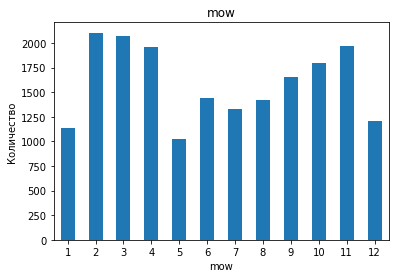

In [71]:
good_data.groupby('mow')['mow'].count().plot(kind='bar', rot='360', ylabel='Количество', title='mow');

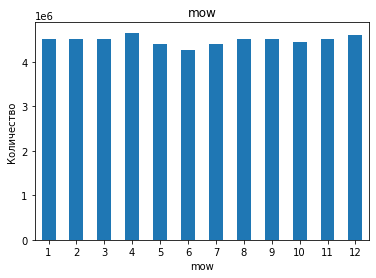

In [72]:
good_data.groupby('mow')['last_price'].median().plot(kind='bar', rot='360', ylabel='Количество', title='mow');

На графике отчетливо видно всплески перед и после новогодними праздниками (в декабре и январе объявления размещались намного реже), также резкий спад активности наблюдается в мае, что логично в связи с майскими празникам, с июня количество объявлений начинается постепенно расти к ноябрю

### 3.2. Анализ скорости продажи квартир.

Для большей наглядности распределения данных построим график

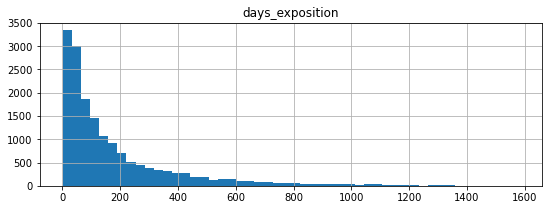

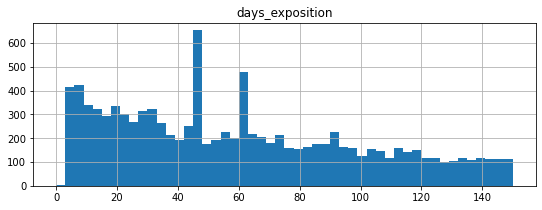

In [73]:
# график по всему массиву значений days_exposition
good_data.hist('days_exposition', bins=50,figsize=(9, 3)); 
# график по первым 150 дням 
good_data.hist('days_exposition', bins=50,range=(0,150),figsize=(9, 3));

In [74]:
print(f'Медиана по столбцу days_exposition: {good_data.days_exposition.median()}')
print(f'Среднее по столбцу days_exposition: {good_data.days_exposition.mean()}')

Медиана по столбцу days_exposition: 98.0
Среднее по столбцу days_exposition: 179.26896510300918


In [75]:
# подсчитаем количество уникальных значений, которые встречаются в столбце
good_data.days_exposition.value_counts().head()

45.00    508
60.00    328
7.00     198
30.00    182
4.00     153
Name: days_exposition, dtype: int64

**Вывод:** На графике наблюдается плавное снижение количества объявлений с увеличением количества дней, т.е. большая часть объектов недвижимости продавалась в течении 100 дней (что подтверждает и медианное значение по всем данным). Общий график дает не совсем корректное представление о данных, т.к. при более детальном рассмотрении видно, что в целом график довольно однородный и снижается плавно, но на отметке в 45 и 60 дней количество проданных объектов недвижимости максимальное и сильно выбивается из общей массы, что подтверждается таблицей с подсчетом количества значений

### 3.3. Проверка зависимости цены помещения от разных параметров.

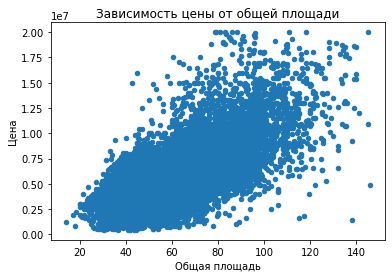

In [76]:
# Проверим зависит ли цена от общей площади
good_data.plot(x='total_area', \
               y='last_price', \
               kind='scatter', \
               xlabel='Общая площадь', \
               ylabel='Цена', \
               title='Зависимость цены от общей площади');

In [77]:
# Проверим коэффициент корреляции этих двух величин
good_data.total_area.corr(good_data.last_price)

0.7303277581000075

На основании графика и коэффициента корреляции можем сделать вывод, что стоимость объектов недвижимости сильно зависит от общей площади

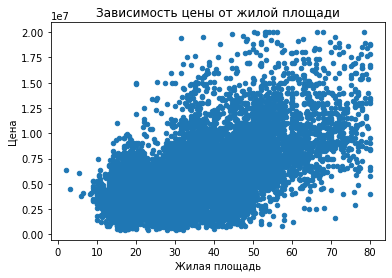

In [78]:
# Проверим зависит ли цена от жилой площади
good_data.plot(x='living_area', \
               y='last_price', \
               kind='scatter', \
               xlabel='Жилая площадь', \
               ylabel='Цена', \
               title='Зависимость цены от жилой площади');

In [79]:
# Проверим коэффициент корреляции этих двух величин
good_data.living_area.corr(good_data.last_price)

0.6149629715114724

Жилая площадь также оказывает прямое влияние на цену объекта недвижимости, но в меньшей степени, чем общая площадь

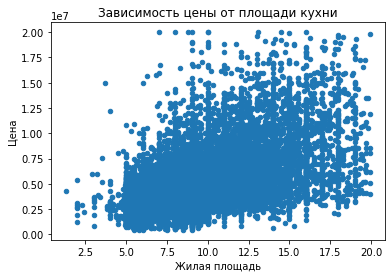

In [80]:
# Проверим зависит ли цена от площади кухни
good_data.plot(x='kitchen_area', \
               y='last_price', \
               kind='scatter', \
               xlabel='Жилая площадь', \
               ylabel='Цена', \
               title='Зависимость цены от площади кухни');

In [81]:
# Проверим коэффициент корреляции этих двух величин
good_data.kitchen_area.corr(good_data.last_price)

0.5231697313849437

Площадь кухни влияет на цену объектов недвижимости, но еще в меньшей степени, чем общая или жилая площадт

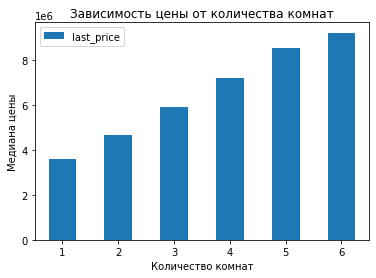

In [82]:
# Проверим зависит ли цена от количества комнат;
good_data.pivot_table(index='rooms', values='last_price',aggfunc='median') \
         .sort_values('last_price') \
         .plot(kind='bar',rot=360, \
               title='Зависимость цены от количества комнат', \
               xlabel='Количество комнат', \
               ylabel='Медиана цены');

Цена объектов недвижимости сильно зависит от количества комнат в нем, но разница между объектами с 4 и 5 комнатами не такая большая, как в остальных случаях

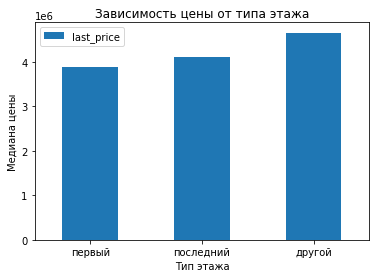

In [83]:
# Проверим зависит ли цена от типа этажа;
good_data.pivot_table(index='type_floor', values='last_price',aggfunc='median') \
         .sort_values('last_price') \
         .plot(kind='bar',rot=360, \
               title='Зависимость цены от типа этажа', \
               xlabel='Тип этажа', \
               ylabel='Медиана цены');

Цена на объекты недвижимости на первом этаже самая низкая, далее по стоимости следут последний этаж, и самые дорогие оказываются этажи из категории "другой"

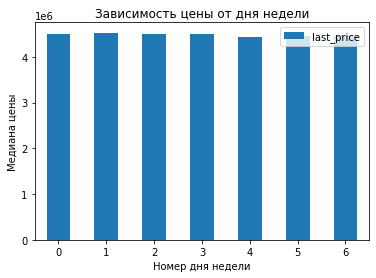

In [84]:
# Проверим зависит ли цена от дня недели размещения объявления;
good_data.pivot_table(index='dow', values='last_price',aggfunc='median') \
         .plot(kind='bar',rot=360, \
               title='Зависимость цены от дня недели', \
               xlabel='Номер дня недели', \
               ylabel='Медиана цены');

Цена на объекты недвижимости практически не зависит от дня недели, когда было размещено объявление, наблюдается только едва заметное снижение в день №4, т.е. пятницу

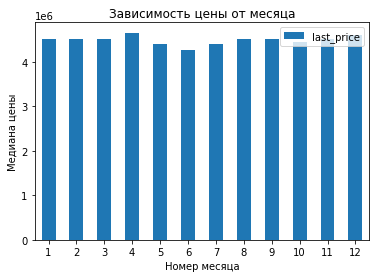

In [85]:
# Проверим зависит ли цена от месяца размещения объявления;
good_data.pivot_table(index='mow', values='last_price',aggfunc='median') \
         .plot(kind='bar',rot=360, \
               title='Зависимость цены от месяца', \
               xlabel='Номер месяца', \
               ylabel='Медиана цены');

Явной зависимости стоимости объекта недвижимости от месяца также не выявлено, наблюдается лишь незначительное снижение цен в летний период, которому предшествует незначительный рост цен в апреле

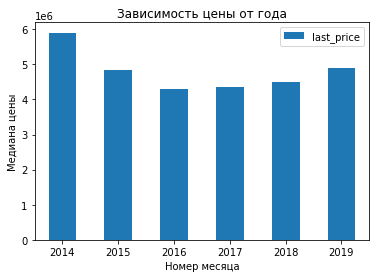

In [86]:
# Проверим зависит ли цена от года рамещения объявления;
good_data.pivot_table(index='yow', values='last_price',aggfunc='median') \
         .plot(kind='bar',rot=360, \
               xlabel='Номер месяца', \
               ylabel='Медиана цены',
               title='Зависимость цены от года');

Прослеживается зависимость цены от года размещения объявления, чем оно дольше размещено, тем дороже - самые дорогие объявления в 2014 году, далее цена постепенно снижается к 2016 году, до 2018 цена практически не меняется и наблюдается незначительный рост в 2019 году

**Вывод:** Исходя из графиков можно сделать вывод, что в первую очередь цена на помещение зависит от общей площади,количества комнат и типа этажа. От площади кухни и жилой площади цена помещения зависит в меньшей степени. День и месяц размещения объявления никак не влияют на цену. Также цена увеличивается в зависимости от того, насколько давно было размещено объявление

In [87]:
# Создаем столбец price_for_meter, для которого посчитаем стоимость одного метра жилья
good_data['price_for_meter'] = good_data['last_price'] / good_data['total_area']

In [88]:
# Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений
# и запишем получившуюся сводную таблицу в переменную best_cities
best_cities = good_data.pivot_table(index='locality_name', \
                                    values='price_for_meter', \
                                    aggfunc=['count','mean'])
# Переименуем столбцы для более удобного к ним обращения
best_cities.columns=['count', 'mean']
# Отсортируем по количеству объявлений и выведем топ10 городов
best_cities.sort_values('count', ascending=False).head(10)

,count,mean
locality_name,,
Санкт-Петербург,12445,107228.16
поселок Мурино,425,85357.85
поселок Шушары,385,78334.80
Всеволожск,345,67173.49
Колпино,316,75183.81
Пушкин,303,101173.56
поселок Парголово,285,90716.74
Гатчина,284,68546.54
деревня Кудрово,213,92858.13


In [89]:
print('Населенные пункты с самой низкой и с самой высокой ценой за метр квадратный жилья:')
good_data.loc[(good_data['price_for_meter'] == good_data['price_for_meter'].max()) | \
              (good_data['price_for_meter'] == good_data['price_for_meter'].min()), \
              ['locality_name','price_for_meter']] \
              .sort_values('price_for_meter')

Населенные пункты с самой низкой и с самой высокой ценой за метр квадратный жилья:


,locality_name,price_for_meter
4405,Сланцы,9615.38
4713,Санкт-Петербург,355555.56


**Вывод:** Самыми дорогими по стоимости метра жилья получаются город Санкт-Петербург и близлежащие к нему города. Чем удаленней от них, тем стоимость жилья меньше

### 3.4. Стоимость километра расстояния от центра Санкт петербурга.

In [90]:
# Сохраним строки, в которых город Санкт-Петербург в переменную spb_good_data
spb_good_data = good_data.query('locality_name == "Санкт-Петербург"')
# Сформируем сводную таблицу на основе новой переменной spb_good_data, чтобы увидеть сколько стоит каждый километр
spb_good_data.pivot_table(index='km_to_center', values='last_price', aggfunc='mean') \
             .rename(columns={'last_price':'avg_price'})

,avg_price
km_to_center,
0.00,8281666.67
1.00,9733980.57
2.00,8956006.76
3.00,7819686.36
4.00,8421771.02
5.00,8509052.51
6.00,7753650.06
7.00,7306971.80
8.00,7401707.11


Для наглядности построим график на основе полученных данных о средней цене:

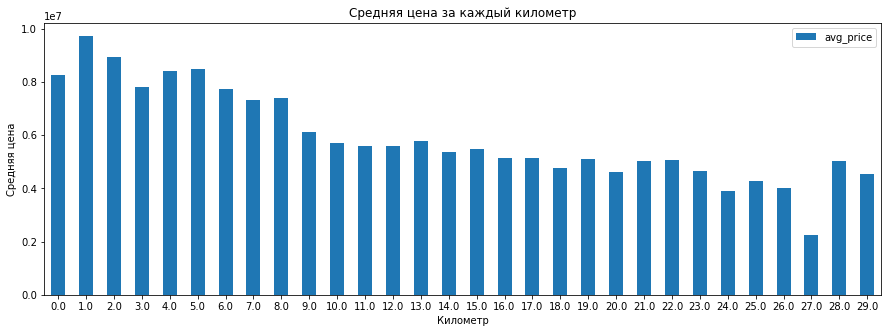

In [91]:
spb_good_data.pivot_table(index='km_to_center', values='last_price', aggfunc='mean') \
             .rename(columns={'last_price':'avg_price'}) \
             .plot(kind='bar', \
                   figsize=(15, 5), \
                   rot=360, ylabel='Средняя цена', \
                   xlabel='Километр', \
                   title='Средняя цена за каждый километр');
#Округлить километры до целых чисел у меня не получилось :(

**Вывод:** Из таблицы и графика видно, что стоимость каждого километра с удалением от центра уменьшается

Теперь посмотрим как стоимость объектов зависит от удаленности от городского центра

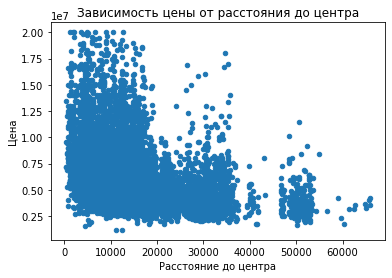

In [92]:
good_data.plot(x='cityCenters_nearest', \
              y='last_price', \
              kind='scatter', \
              xlabel='Расстояние до центра', \
              ylabel='Цена', \
              title='Зависимость цены от расстояния до центра');

Для наглядности данных разделим их на условные подгруппы

In [93]:
# cоздадим функцию, которая присвоит каждому значению группу в зависимости от удаленности от центра 
def distance_category(row):
    distance = row['cityCenters_nearest']
    top_floor = row['cityCenters_nearest']    
    try:
        if distance < 10000:
            return 'до 10 км'
        if distance < 20000:
            return 'до 20 км'
        if distance < 30000:
            return 'до 30 км'
        if distance >= 30000:
            return 'более 30 км'
    except:
        return 'расстояние не определено'
good_data['distance_category'] = good_data.apply(distance_category, axis=1) 


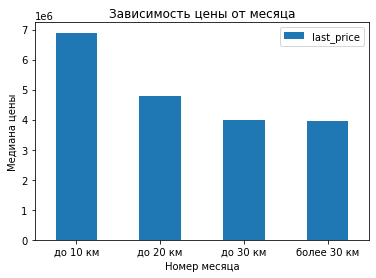

In [94]:
# Проверим зависит ли цена от месяца размещения объявления;
good_data.pivot_table(index='distance_category', values='last_price',aggfunc='median') \
         .sort_values('last_price', ascending=False) \
         .plot(kind='bar',rot=360, \
               title='Зависимость цены от месяца', \
               xlabel='Номер месяца', \
               ylabel='Медиана цены');

**Вывод** расстояние до центра влияет на стоимость объектов до 30 км. После этого стоимость объектов почти не меняется, уменьшается только их количество

## Общий вывод

Проведенный анализ показал, что стоимость квартир напрямую зависит от:
* общей площади
* количества комнат
* этажа, на котором находится объект недвижимости
* удаленность от центра города (до 10 км, до 20 км, 30 км и более)
* год размещения объявления (2014)

Менее влияющие факторы, но которые все равно стоит учитывать:
* жилая площадь объекта
* площадь кухни
* год размещения объявления (посе 2014)
* месяц размещения объявления (объявления, размещенные в теплый период имеют меньшую стоимость)

Таким образом самая дорогая квартира будет с наибольшей площадь, наибольшим количеством комнат, находящаямя не на первом и не на последнем этаже и в максимальной близости к центру города